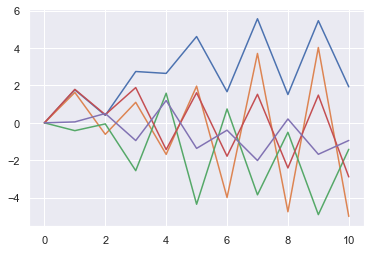

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

monte_carlo = []
for i in range(5):
    forecasts = [0]
    np.random.seed(i)
    for j in range(10):
        forecast = forecasts[j-1] + np.random.normal()
        forecasts.append(forecast)
    monte_carlo.append(forecasts)
plt.plot(np.array(monte_carlo).T);
# plt.savefig("assets/random_walk.png")

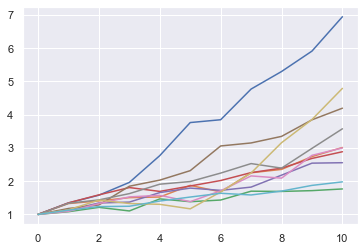

In [2]:
monte_carlo = []
no_of_iter = 10
sigma = 0.2
mu = 0.5
delta_t = 0.25
for i in range(no_of_iter):
    np.random.seed(i)
    forecasts = [1]
    for j in range(10):
        forecast = forecasts[j]*np.exp((mu-sigma**2/2)*(delta_t) + sigma*np.sqrt(delta_t)*np.random.normal())
        forecasts.append(forecast)
    monte_carlo.append(forecasts)
x = np.array(monte_carlo)
plt.plot(x.T);
# plt.savefig("assets/GBM.png")

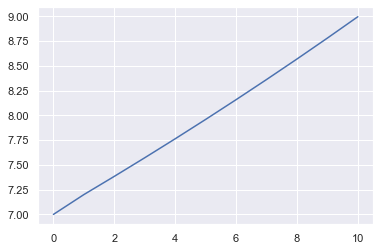

In [3]:
revenues = []
gross_profits = []
mu = 0.02
revenue = [10]
fixed_cost = [2]
var_cost = [1]
for j in range(10):
    revenue.append(revenue[j]*(1+mu))
    fixed_cost.append(fixed_cost[j])
    var_cost.append(revenue[j]*0.1)
    gross_profit = [x - y - z for x, y, z in zip(revenue, fixed_cost, var_cost)]
plt.plot(np.array(gross_profit));
# plt.savefig("assets/gross_profit.png")

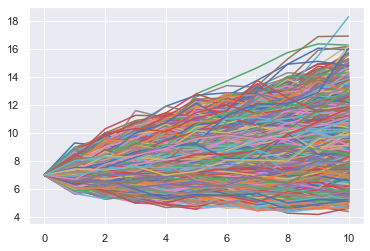

In [4]:
no_of_iter = 10000
delta_t = 1
revenues = []
gross_profits = []
for i in range(no_of_iter):
    revenue = [10]
    mu = 0.02
    sigma = 0.05
    fixed_cost = [2]
    var_cost = [1]
    np.random.seed(i)
    for j in range(10):
        revenue.append(revenue[j]*np.exp((mu-sigma**2/2)*(delta_t) + sigma*np.sqrt(delta_t)*np.random.normal()))
        fixed_cost.append(fixed_cost[j])
        var_cost.append(revenue[j]*0.1)
        gross_profit = [x - y - z for x, y, z in zip(revenue, fixed_cost, var_cost)]
    revenues.append(revenue)
    gross_profits.append(gross_profit)
gross_profits = np.array(gross_profits)
gross_profits.mean(axis=0)
plt.plot(np.array(gross_profits).T);
# plt.savefig("assets/gross_profit_mcs.png")

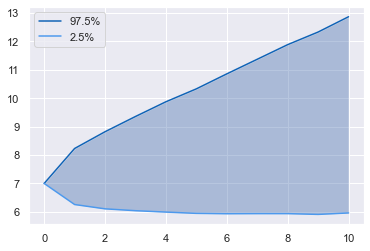

In [7]:
def interval_chart(gross_profits):
    fig, ax = plt.subplots()
    x = np.arange(11)
    y1 = np.percentile(gross_profits, 97.5, axis=0)
    y2 = np.percentile(gross_profits, 2.5, axis=0)
    ax.plot(y1, color = '#1063B6')
    ax.plot(y2, color = '#4D99ED')
    ax.fill_between(x, y1, y2, alpha=0.4)
    ax.legend(labels=["97.5%","2.5%"])
    return plt.show()

interval_chart(gross_profits)
# plt.savefig("assets/gross_profit_range.png")

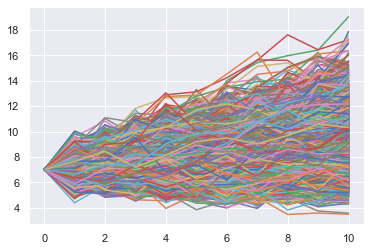

In [9]:
no_of_iter = 10000
delta = 1
revenues = []
gross_profits = []
for i in range(no_of_iter):
    revenue = [10]
    mu = 0.02
    sigma = 0.05
    fixed_cost = [2]
    var_cost = [1]
    np.random.seed(i)
    for j in range(10):
        revenue.append(revenue[j]*np.exp((mu-sigma**2/2)*(delta_t) + sigma*np.sqrt(delta_t)*np.random.normal()))
        fixed_cost.append(fixed_cost[j])
        var_cost.append(revenue[j]*np.random.normal(0.1,0.05))
        gross_profit = [x - y - z for x, y, z in zip(revenue, fixed_cost, var_cost)]
    revenues.append(revenue)
    gross_profits.append(gross_profit)
gross_profits = np.array(gross_profits)
gross_profits.mean(axis=0)
plt.plot(np.array(gross_profits).T);
# plt.savefig("assets/gross_profit_mcs_2.png")

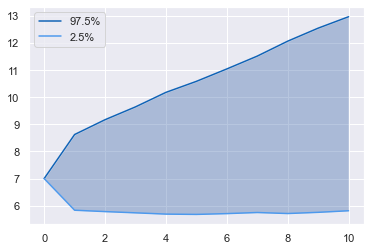

In [10]:
interval_chart(gross_profits)
# plt.savefig("assets/gross_profit_range_2.png")